In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, log_loss,balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_bank_train = pd.read_csv("/MachineHack/Input Dataset/train.csv")
df_bank_test = pd.read_csv("/MachineHack/Input Dataset/test.csv")

# Using Training Dataset

In [3]:
df_bank_train.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y_bool       False
dtype: bool

In [4]:
# Preprocessing Dataset : Age

age_rank = KBinsDiscretizer(n_bins=5,strategy='quantile',encode='ordinal')
age_rank.fit(df_bank_train[['age']])
age_rank.fit(df_bank_test[['age']])

df_bank_train['age_rank'] = age_rank.transform(df_bank_train[['age']])
df_bank_test['age_rank'] = age_rank.transform(df_bank_test[['age']])

age_rank.bin_edges_

def age_group(age):
    if age < 25:
        return 'Youth'
    elif age >= 25 and age < 64:
        return 'Adult'
    else:
        return 'Senior'
    
df_bank_train['age_group'] = df_bank_train['age'].map(age_group)
df_bank_test['age_group'] = df_bank_test['age'].map(age_group)

In [5]:
# Preprocessing Dataset : Job

def job_category(job):
    if job in ['self-employed','housemaid','entrepreneur']:
        return 'self_employed'
    elif job in ['unknown','unemployed','student']:
        return 'unemployed'
    elif job in ['blue-collar','services']:
        return 'blue_collar'
    else:
        return job
    
df_bank_train['job_category'] = df_bank_train['job'].map(job_category)
df_bank_test['job_category'] = df_bank_test['job'].map(job_category)

In [6]:
# Preprocessing Dataset : Balance

df_bank_train['balance_pos']=df_bank_train['balance'].apply(lambda x: 'Yes' if x > 0 else 'No')
df_bank_test['balance_pos']=df_bank_test['balance'].apply(lambda x: 'Yes' if x > 0 else 'No')

balance_rank = KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')
balance_rank.fit(df_bank_train[['balance']])
balance_rank.fit(df_bank_test[['balance']])

df_bank_train['balance_rank'] = balance_rank.transform(df_bank_train[['balance']])
df_bank_test['balance_rank'] = balance_rank.transform(df_bank_test[['balance']])
balance_rank.bin_edges_

def balance_range(bal):
    if bal < 25:
        return 'Low'
    elif bal >= 25 and bal < 500:
        return 'Medium'
    elif bal >= 500 and bal < 2000:
        return 'High'
    else:
        return 'Very-High'
    
    
df_bank_train['balance_range'] = df_bank_train['balance'].map(balance_range)
df_bank_test['balance_range'] = df_bank_test['balance'].map(balance_range)

In [7]:
# Preprocessing Dataset : Day

def week(day):
    if day < 8:
        return 'Week_1'
    elif day >= 8 and day < 15:
        return 'Week_2'
    elif day >= 15 and day < 22:
        return 'Week_3'
    else:
        return 'Week_4'
    
df_bank_train['week'] = df_bank_train['day'].map(week)
df_bank_test['week'] = df_bank_test['day'].map(week)

In [8]:
# Preprocessing Dataset : Day

df_bank_train['duration'] = df_bank_train['duration'] / 60
df_bank_test['duration'] = df_bank_test['duration'] / 60

duration_rank = KBinsDiscretizer(n_bins=5,strategy='quantile',encode='ordinal')

duration_rank.fit(df_bank_train[['duration']])
duration_rank.fit(df_bank_test[['duration']])

df_bank_train['duration_rank'] = duration_rank.transform(df_bank_train[['duration']])
df_bank_test['duration_rank'] = duration_rank.transform(df_bank_test[['duration']])
duration_rank.bin_edges_

def call_time(time):
    if time < 1:
        return '<1min'
    elif time >= 1 and time < 3:
        return '1-2min'
    elif time >= 3 and time <= 10:
        return '3-10min'
    else:
        return '>10 min'
    
df_bank_train['call_duration'] = df_bank_train['duration'].map(call_time)
df_bank_test['call_duration'] = df_bank_test['duration'].map(call_time)

In [9]:
# Preprocessing Dataset : PDays

df_bank_train['customer_segment'] = df_bank_train['pdays'].apply(lambda x:'New_Customer' if x == -1 else 'Old_Customer')
df_bank_test['customer_segment'] = df_bank_test['pdays'].apply(lambda x:'New_Customer' if x == -1 else 'Old_Customer')

In [10]:
features = ['age','job_category','marital','education','balance','housing','loan','contact','month','duration','campaign',
            'poutcome','age_group','balance_range','week','call_duration','customer_segment']

X = df_bank_train[features]
Z = df_bank_test[features]
y = df_bank_train['y_bool']

# Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4286,random_state=42)

Text(0.5, 1.0, 'Before Outlier Capping')

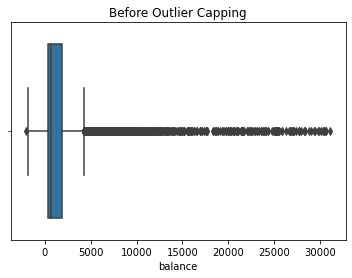

In [11]:
# Before Capping Outliers

def outlier_capping(df,col):

        q1 = df_bank_train[col].quantile(0.25)
        q3 = df_bank_train[col].quantile(0.75)
        iqr = q3 - q1
        
        upper_whisker = q3 + 1.5 * iqr
        lower_whisker = q1- 1.5 * iqr
        
        df_bank_train[col] = np.where(df_bank_train[col] > upper_whisker,upper_whisker,np.where(df_bank_train[col] < lower_whisker,lower_whisker,df_bank_train[col]))
        
sns.boxplot(X_train['balance'])
plt.title('Before Outlier Capping')

Text(0.5, 1.0, 'After Outlier Capping')

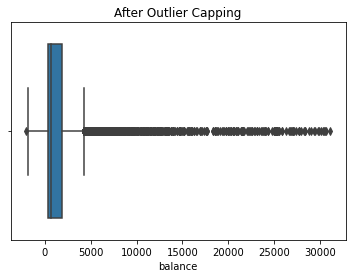

In [12]:
# After Capping Outliers

outlier_cols = ['age','balance','duration','campaign']
for col in outlier_cols:
    outlier_capping(X_train,col)
    
outlier_cols=['age','balance','duration','campaign']
for col in outlier_cols:
    outlier_capping(X,col)
    
sns.boxplot(X_train['balance'])
plt.title('After Outlier Capping')    

In [13]:
# Creating Dummies

X_train = pd.get_dummies(X_train,columns=['job_category', 'marital', 'education','housing', 'loan',
                                        'contact', 'month','poutcome','age_group','balance_range', 'week',
                                        'call_duration', 'customer_segment'], drop_first=False)

X = pd.get_dummies(X,columns=['job_category', 'marital', 'education','housing', 'loan',
                                        'contact', 'month','poutcome','age_group','balance_range', 'week',
                                        'call_duration', 'customer_segment'], drop_first=False)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            21000 non-null  int64  
 1   balance                        21000 non-null  int64  
 2   duration                       21000 non-null  float64
 3   campaign                       21000 non-null  int64  
 4   job_category_admin.            21000 non-null  uint8  
 5   job_category_blue_collar       21000 non-null  uint8  
 6   job_category_management        21000 non-null  uint8  
 7   job_category_retired           21000 non-null  uint8  
 8   job_category_self_employed     21000 non-null  uint8  
 9   job_category_technician        21000 non-null  uint8  
 10  job_category_unemployed        21000 non-null  uint8  
 11  marital_divorced               21000 non-null  uint8  
 12  marital_married                21000 non-null 

In [15]:
#categories = ['job','marital','education','default','housing','loan','contact','month','day','poutcome','y_bool']
#for col in categories:
#plt.figure(figsize=(11,6))
#col = 'loan'
#sns.barplot(df_bank_train[col].value_counts(),df_bank_train[col].value_counts().index, data=df_bank_train)
#plt.title(col)
#plt.tight_layout()

In [16]:
# Removing unwanted fields

X_train.drop(columns=['job_category_unemployed','education_unknown','contact_unknown','month_dec',                      
                      'poutcome_unknown','age_group_Youth','balance_range_Low','week_Week_1',
                      'call_duration_1-2min','call_duration_<1min','customer_segment_New_Customer'], inplace=True)

X.drop(columns=['job_category_unemployed','education_unknown','contact_unknown','month_dec',
                'poutcome_unknown','age_group_Youth','balance_range_Low','week_Week_1',
                'call_duration_1-2min','call_duration_<1min','customer_segment_New_Customer'], inplace=True)

X.shape

(21000, 47)

In [17]:
# Random Forest Classification

random_forest = RandomForestClassifier(n_jobs=-1,oob_score=True)
random_forest.fit(X_train,y_train)
random_forest.oob_score_

0.7201433452787732

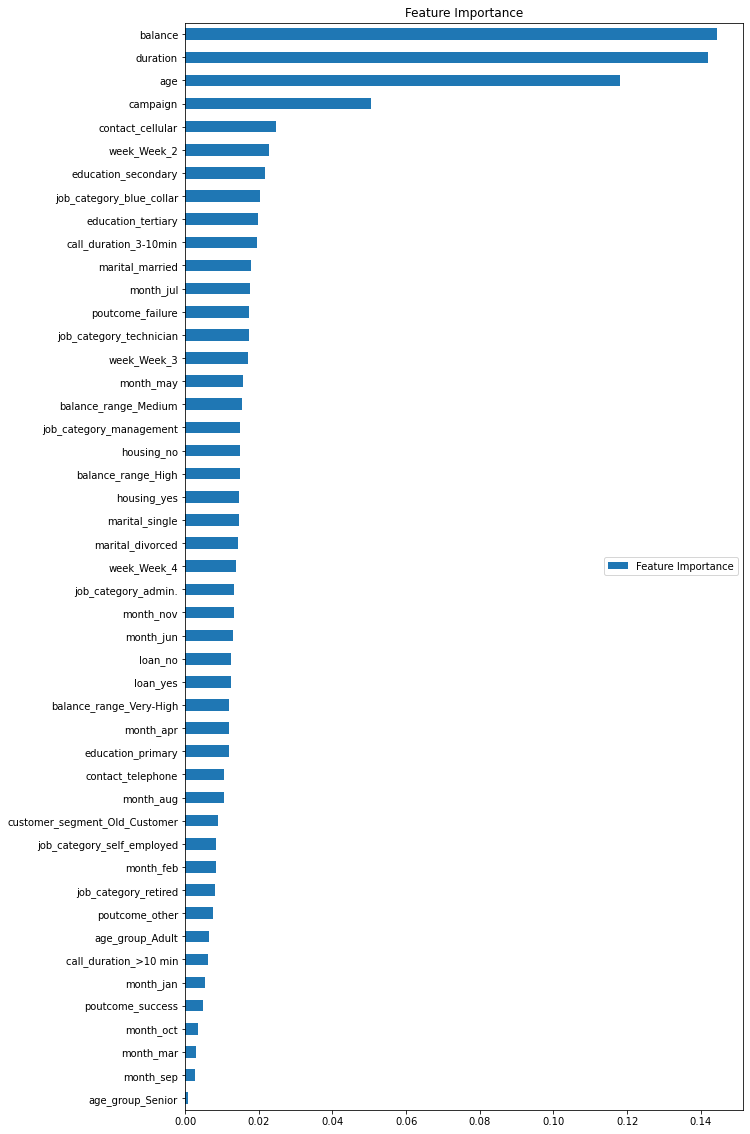

In [18]:
# Mapping Feature Importance

random_forest.feature_importances_
feature_importance = pd .DataFrame(data=random_forest.feature_importances_,index=X_train.columns,columns=['Feature Importance'])
feature_importance.sort_values('Feature Importance').plot(kind='barh',title='Feature Importance',figsize=(10,20)).legend(loc='right')

In [19]:
# Feature List 

feature_list = feature_importance[feature_importance['Feature Importance'] > 0.016].index
feature_list = feature_list.to_list()
feature_list

['age',
 'balance',
 'duration',
 'campaign',
 'job_category_blue_collar',
 'job_category_technician',
 'marital_married',
 'education_secondary',
 'education_tertiary',
 'contact_cellular',
 'month_jul',
 'poutcome_failure',
 'week_Week_2',
 'week_Week_3',
 'call_duration_3-10min']

In [20]:
# Feature Mapping

X_train = X_train[feature_list]
X = X[feature_list]

outlier_cols=['age','balance','duration','campaign']
for col in outlier_cols:
    outlier_capping(X_test,col)

X_test=pd.get_dummies(X_test,columns=['job_category', 'marital', 'education','housing', 'loan','contact', 'month','poutcome','age_group','balance_range', 'week', 'call_duration', 'customer_segment'], drop_first=False)

X_test = X_test[feature_list]

### Model Fitting & Metric Description

In [21]:
def accuracy_func(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print(y_pred.sum())
    accuracy = accuracy_score(y_test,y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
    log_loss_score = log_loss(y_test,y_pred)
    
    print('Accuracy: {}'.format(accuracy))
    print('Balanced Accuracy: {}'.format(balanced_accuracy))
    print('Log Loss: {}'.format(log_loss_score))

In [22]:
# Random Forest Classification
random_forest = RandomForestClassifier(n_estimators=100,max_depth=5,n_jobs=-1,random_state=50)
random_forest.fit(X_train,y_train)
accuracy_func(random_forest,X_test,y_test)

0
Accuracy: 0.7310298855682702
Balanced Accuracy: 0.5
Log Loss: 9.289898639271055


In [23]:
# Logistic Regression
logistic_regression = LogisticRegression(random_state=50)
logistic_regression.fit(X_train,y_train)

accuracy_func(logistic_regression,X_test,y_test)

0
Accuracy: 0.7310298855682702
Balanced Accuracy: 0.5
Log Loss: 9.289898639271055


In [24]:
# Ada Boost
ada_boost = AdaBoostClassifier(n_estimators=100,random_state=50)
ada_boost.fit(X_train,y_train)

accuracy_func(ada_boost,X_test,y_test)

11
Accuracy: 0.731807576935896
Balanced Accuracy: 0.5017067603755889
Log Loss: 9.263038308688952


In [25]:
# Decision Tree

dtree = DecisionTreeClassifier(criterion='gini') 
dtree.fit(X_train,y_train)
accuracy_func(dtree,X_test,y_test)

2649
Accuracy: 0.5918231307632486
Balanced Accuracy: 0.49590302808882264
Log Loss: 14.098102931839591


In [26]:
# KNN

knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train,y_train)
accuracy_func(knn,X_test,y_test)

75
Accuracy: 0.728252416398178
Balanced Accuracy: 0.5013637636235121
Log Loss: 9.385833467595049


In [27]:
# SVC

svc= SVC(kernel = 'sigmoid')
svc.fit(X_train,y_train)
accuracy_func(svc,X_test,y_test)

2454
Accuracy: 0.5970447728030219
Balanced Accuracy: 0.489814616030704
Log Loss: 13.917743056064694


In [28]:
# Gradient Boost

gradient_boost = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.09, max_depth=5)
gradient_boost.fit(X_train,y_train)
accuracy_func(gradient_boost,X_test,y_test)

99
Accuracy: 0.7260304410621042
Balanced Accuracy: 0.5001050835583779
Log Loss: 9.462579731237055


In [29]:
# Naive Bayes

gaussian_nb= GaussianNB()
gaussian_nb.fit(X_train,y_train)
accuracy_func(gradient_boost,X_test,y_test)

99
Accuracy: 0.7260304410621042
Balanced Accuracy: 0.5001050835583779
Log Loss: 9.462579731237055


In [30]:
# Neural Network

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=12,activation="relu")) 
ann.add(tf.keras.layers.Dense(units=8,activation="relu")) 
ann.add(tf.keras.layers.Dense(units=8,activation="relu")) 
ann.add(tf.keras.layers.Dense(units=7,activation="relu")) 
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy']) 
ann.fit(X_train,y_train,batch_size=32,epochs = 150)
ann.save("ANN_MachineHack_Subscriber.h5")

Epoch 1/150
375/375 [==============================] - 1s 1ms/step - loss: 1.2499 - accuracy: 0.6370
Epoch 2/150
375/375 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.7129
Epoch 3/150
375/375 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.7126
Epoch 4/150
375/375 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.7158
Epoch 5/150
375/375 [==============================] - 0s 1ms/step - loss: 0.6361 - accuracy: 0.7185
Epoch 6/150
375/375 [==============================] - 0s 1ms/step - loss: 0.6381 - accuracy: 0.7222
Epoch 7/150
375/375 [==============================] - 0s 1ms/step - loss: 0.6341 - accuracy: 0.7198
Epoch 8/150
375/375 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.7182
Epoch 9/150
375/375 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.7254
Epoch 10/150
375/375 [==============================] - 0s 1ms/step - loss: 0.6237 - accura

In [31]:
acc = ann.evaluate(X_test,y_test)
print(acc)

282/282 [==============================] - 1s 1ms/step - loss: 0.6031 - accuracy: 0.7268
[0.6031206250190735, 0.7268081307411194]


# Using Test Dataset

In [32]:
# Creating dummies
for col in outlier_cols:
    outlier_capping(Z,col)
    
Z = pd.get_dummies(Z,columns=['job_category', 'marital', 'education','housing', 'loan',
                                       'contact', 'month','poutcome','age_group',
                                       'balance_range', 'week', 'call_duration', 'customer_segment'], drop_first=False)

In [33]:
Z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            9000 non-null   int64  
 1   balance                        9000 non-null   int64  
 2   duration                       9000 non-null   float64
 3   campaign                       9000 non-null   int64  
 4   job_category_admin.            9000 non-null   uint8  
 5   job_category_blue_collar       9000 non-null   uint8  
 6   job_category_management        9000 non-null   uint8  
 7   job_category_retired           9000 non-null   uint8  
 8   job_category_self_employed     9000 non-null   uint8  
 9   job_category_technician        9000 non-null   uint8  
 10  job_category_unemployed        9000 non-null   uint8  
 11  marital_divorced               9000 non-null   uint8  
 12  marital_married                9000 non-null   u

In [34]:
# Removing unwanted fields
Z.drop(columns=['job_category_unemployed','education_unknown','contact_unknown','month_dec',
                      'poutcome_unknown','age_group_Youth','balance_range_Low','week_Week_1',
                      'call_duration_1-2min','call_duration_<1min','customer_segment_New_Customer'], inplace=True)

In [38]:
# Prediction
Z = Z[feature_list]

y_pred = ada_boost.predict(Z)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# Result

df_bank_submit = pd.read_csv("/MachineHack/Output Dataset/submission.csv")
df_bank_submit['y_bool'] = y_pred
df_bank_submit['y_bool'].unique()

array([0, 1], dtype=int64)

In [40]:
# Storing as CSV 
df_bank_submit.to_csv("/MachineHack/Input Dataset/submission.csv", index = False)